In [1]:
import pandas as pd
import datetime
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
file = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel(file, 'Transactions', header=1)
df2 = pd.read_excel(file, 'NewCustomerList', header=1)
df3 = pd.read_excel(file, 'CustomerDemographic', header=1)
df4 = pd.read_excel(file, 'CustomerAddress', header=1)

mfpg = pd.ExcelFile('Multifactor Productivity Growth.xlsx')
mfpg1 = pd.read_excel(mfpg, 'Sheet1', header=1)
mfpg2 = pd.read_excel(mfpg, 'Sheet2', header=2)

In [3]:
df3.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [4]:
df3['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [5]:
def calculateAge(birthDate): 
    today = date.today() 
    age = today.year - birthDate.year - ((today.month, today.day) < (birthDate.month, birthDate.day))
    return age

In [6]:
df3 = df3[df3['deceased_indicator'] != 'Y']
df3 = df3.dropna(axis=0, subset = ['DOB'])
df3 = df3.drop(['default'], axis=1)

df3['age'] = [calculateAge(i) for i in df3['DOB']]
df3 = df3[df3['age'] < 110]
df3['gender'] = ['Male' if i == 'M' else 'Female' if i == 'F' else 'Female' if i == 'Femal' else i for i in df3['gender']]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3999
Data columns (total 13 columns):
customer_id                            3910 non-null int64
first_name                             3910 non-null object
last_name                              3789 non-null object
gender                                 3910 non-null object
past_3_years_bike_related_purchases    3910 non-null int64
DOB                                    3910 non-null datetime64[ns]
job_title                              3413 non-null object
job_industry_category                  3254 non-null object
wealth_segment                         3910 non-null object
deceased_indicator                     3910 non-null object
owns_car                               3910 non-null object
tenure                                 3910 non-null float64
age                                    3910 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 427.7+ KB


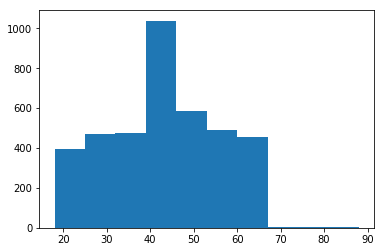

In [7]:
plt.hist(np.array(df3['age']))
plt.show();

In [8]:
bins = [0, 25, 35, 45, 55, 110]
bins_age = pd.cut(df3['age'], bins, right=False)
df3['agebin'] = bins_age

In [9]:
paying_cust = set(df1['customer_id'])
df3 = df3[df3['customer_id'].isin(paying_cust)]

In [10]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [11]:
df1 = df1[df1['order_status'] == 'Approved']
df1 = df1[~df1['product_first_sold_date'].isna()]
df1['product_first_sold_date'] = [datetime.timedelta(days=i) if i != np.NaN else i for i in df1['product_first_sold_date']]

In [12]:
df1['season'] = [(i.month%12 + 3)//3 for i in df1.transaction_date]
df1['season'] = ['Winter' if i == 1 else 'Spring' if i == 2 else 'Summer' if i == 3 else 'Fall' for i in df1['season']]

In [13]:
df1['Sale_revenue'] = df1['list_price'] - df1['standard_cost']
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,season,Sale_revenue
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245 days,Winter,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701 days,Spring,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361 days,Fall,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145 days,Summer,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226 days,Fall,1055.82


In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
customer_id           3999 non-null int64
address               3999 non-null object
postcode              3999 non-null int64
state                 3999 non-null object
country               3999 non-null object
property_valuation    3999 non-null int64
dtypes: int64(3), object(3)
memory usage: 187.5+ KB


In [15]:
df4.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
df4['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [17]:
df4['state'] = ['NSW' if i == 'New South Wales' else 'VIC' if i == 'Victoria' else i for i in df4['state']]

In [18]:
df2.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [19]:
df2 = df2.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)

df2 = df2[~df2['DOB'].isna()]
df2['age'] = [calculateAge(i) for i in df2['DOB']]
bins = [0, 25, 35, 45, 55, 110]
bins_age = pd.cut(df2['age'], bins, right=False)
df2['agebin'] = bins_age

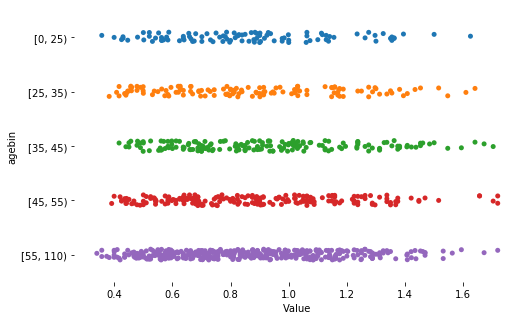

In [20]:
fig, ax = plt.subplots(figsize = (8,5))
sns.despine(bottom=True, left=True)

sns.stripplot(x='Value', y='agebin', data=df2, dodge=True, jitter=True)
plt.show()

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 20 columns):
first_name                             983 non-null object
last_name                              954 non-null object
gender                                 983 non-null object
past_3_years_bike_related_purchases    983 non-null int64
DOB                                    983 non-null datetime64[ns]
job_title                              878 non-null object
job_industry_category                  818 non-null object
wealth_segment                         983 non-null object
deceased_indicator                     983 non-null object
owns_car                               983 non-null object
tenure                                 983 non-null int64
address                                983 non-null object
postcode                               983 non-null int64
state                                  983 non-null object
country                                983 non-null object
prope

In [22]:
metro = ['2000', '2033', '2066', '2097', '2128', '2159', '2200', '2231', '2294', '2519', '2762', '2004', '2034', '2067', '2099', '2129', '2160', '2201', '2232', '2295', '2520', '2763', '2005', '2035', '2068', '2100', '2130', '2161', '2202', '2233', '2296', '2525', '2764', '2006', '2036', '2069', '2101', '2131', '2162', '2203', '2234', '2297', '2526', '2765', '2007', '2037', '2070', '2102', '2132', '2163', '2204', '2251', '2298', '2527', '2766', '2008', '2038', '2071', '2103', '2133', '2164', '2205', '2252', '2299', '2529', '2767', '2009', '2039', '2072', '2104', '2134', '2165', '2206', '2256', '2300', '2530', '2768', '2010', '2040', '2073', '2105', '2135', '2166', '2207', '2257', '2302', '2558', '2770', '2011', '2041', '2074', '2106', '2136', '2167', '2208', '2258', '2303', '2559', '2012', '2042', '2075', '2107', '2137', '2168', '2209', '2259', '2304', '2560', '2013', '2043', '2076', '2108', '2138', '2169', '2210', '2260', '2305', '2563', '2014', '2044', '2077', '2109', '2139', '2170', '2211', '2261', '2306', '2564', '2015', '2045', '2079', '2110', '2140', '2171', '2212', '2262', '2307', '2565', '2016', '2046', '2080', '2111', '2141', '2173', '2213', '2263', '2308', '2566', '2017', '2047', '2081', '2112', '2142', '2174', '2214', '2264', '2309', '2567', '2018', '2048', '2082', '2113', '2143', '2175', '2216', '2267', '2310', '2568', '2019', '2049', '2083', '2114', '2144', '2176', '2217', '2278', '2314', '2020', '2050', '2084', '2115', '2145', '2177', '2218', '2280', '2322', '2571', '2021', '2051', '2085', '2116', '2146', '2178', '2219', '2281', '2323', '2745', '2022', '2052', '2086', '2117', '2147', '2179', '2220', '2282', '2485', '2746', '2023', '2056', '2087', '2118', '2148', '2190', '2221', '2283', '2486', '2747', '2024', '2057', '2088', '2119', '2150', '2191', '2222', '2284', '2500', '2748', '2025', '2058', '2089', '2120', '2151', '2192', '2223', '2285', '2502', '2749', '2026', '2059', '2090', '2121', '2152', '2193', '2224', '2286', '2505', '2750', '2027', '2060', '2091', '2122', '2153', '2194', '2225', '2287', '2506', '2751', '2028', '2061', '2092', '2123', '2154', '2195', '2226', '2289', '2508', '2754', '2029', '2062', '2093', '2124', '2155', '2196', '2227', '2290', '2515', '2755', '2030', '2063', '2094', '2125', '2156', '2197', '2228', '2291', '2516', '2759', '2031', '2064', '2095', '2126', '2157', '2198', '2229', '2292', '2517', '2760', '2032', '2065', '2096', '2127', '2158', '2199', '2230', '2293', '2518', '2761', '4000', '4022', '4061', '4102', '4118', '4153', '4173', '4219', '4304', '4556', '4005', '4029', '4064', '4103', '4119', '4154', '4174', '4220', '4305', '4557', '4006', '4030', '4065', '4104', '4120', '4155', '4178', '4221', '4500', '4558', '4007', '4031', '4066', '4105', '4121', '4156', '4179', '4222', '4501', '4559', '4008', '4032', '4067', '4106', '4122', '4157', '4205', '4223', '4502', '4564', '4009', '4034', '4068', '4107', '4123', '4158', '4207', '4224', '4503', '4566', '4010', '4035', '4069', '4108', '4125', '4159', '4209', '4225', '4504', '4567', '4011', '4036', '4070', '4109', '4127', '4160', '4210', '4226', '4505', '4572', '4012', '4037', '4072', '4110', '4128', '4161', '4211', '4227', '4506', '4573', '4013', '4051', '4073', '4111', '4129', '4163', '4212', '4228', '4509', '4575', '4014', '4052', '4074', '4112', '4130', '4164', '4213', '4229', '4508', '4810', '4017', '4053', '4075', '4113', '4131', '4165', '4214', '4230', '4510', '4812', '4018', '4054', '4076', '4114', '4132', '4169', '4215', '4231', '4511', '4813', '4019', '4055', '4077', '4115', '4133', '4170', '4216', '4300', '4551', '4814', '4020', '4059', '4078', '4116', '4151', '4171', '4217', '4301', '4553', '4817', '4021', '4060', '4101', '4117', '4152', '4172', '4218', '4303', '4555', '4870', '3000', '3025', '3046', '3067', '3090', '3124', '3144', '3169', '3189', '3212', '3806', '3002', '3026', '3047', '3068', '3093', '3125', '3145', '3170', '3190', '3214', '3807', '3003', '3027', '3048', '3070', '3094', '3126', '3146', '3171', '3191', '3215', '3809', '3004', '3028', '3049', '3071', '3095', '3127', '3147', '3172', '3192', '3216', '3810', '3005', '3029', '3051', '3072', '3101', '3128', '3148', '3173', '3193', '3910', '3006', '3031', '3052', '3073', '3102', '3129', '3149', '3174', '3194', '3218', '3930', '3008', '3032', '3053', '3074', '3103', '3130', '3150', '3175', '3195', '3219', '3931', '3011', '3033', '3054', '3075', '3104', '3131', '3151', '3177', '3196', '3220', '3975', '3012', '3034', '3055', '3076', '3105', '3132', '3152', '3178', '3197', '3221', '3976', '3013', '3036', '3056', '3078', '3106', '3133', '3153', '3179', '3198', '3335', '3015', '3037', '3057', '3079', '3107', '3134', '3155', '3180', '3199', '3337', '3016', '3038', '3058', '3081', '3108', '3135', '3156', '3181', '3200', '3338', '3018', '3039', '3059', '3082', '3109', '3136', '3161', '3182', '3201', '3429', '3019', '3040', '3060', '3083', '3111', '3137', '3162', '3183', '3202', '3752', '3020', '3041', '3061', '3084', '3114', '3138', '3163', '3184', '3204', '3754', '3021', '3042', '3062', '3085', '3116', '3140', '3165', '3185', '3205', '3765', '3022', '3043', '3064', '3087', '3121', '3141', '3166', '3186', '3206', '3802', '3023', '3044', '3065', '3088', '3122', '3142', '3167', '3187', '3207', '3803', '3024', '3045', '3066', '3089', '3123', '3143', '3168', '3188', '3211', '3805']

df2['postcode'] = df2.postcode.astype(str)
df4['postcode'] = df4.postcode.astype(str)

df2['metro'] = [1 if i in metro else 0 for i in df2.postcode]
df4['metro'] = [1 if i in metro else 0 for i in df4.postcode]

In [23]:
with pd.ExcelWriter('Cleaned.xlsx') as writer:
    df3.to_excel(writer, sheet_name='CustDemo')
    df1.to_excel(writer, sheet_name='Transactions')
    df2.to_excel(writer, sheet_name='NewCust')
    df4.to_excel(writer, sheet_name='CustAddresses')